Reference: 

https://medium.com/@ismaelbouarfa/malicious-url-detection-with-machine-learning-d57890443dec

https://www.kaggle.com/code/princeroy15/xss-detection-by-machine-learning

https://www.activestate.com/blog/phishing-url-detection-with-python-and-ml/

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import nltk
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv('/content/XSS_dataset.csv',encoding='utf-8-sig')
X = df['Sentence']
y = df['Label']

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

FileNotFoundError: ignored

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.9981731823164048
test accuracy = 0.9985390796201608


In [ ]:
X_predict = ["22-08-07 XSS Logger INFO <div><b>Hello good tag</b></div>",
             "22-08-07 XSS Logger INFO <button onClick='alert(document.cookie)'>",
             "22-08-07 XSS Logger INFO <button onSubmit='sendForm()'>",
             "22-08-07 XSS Logger INFO <div><b>Name:</b>User</div>",
             "22-08-07 XSS Logger INFO <div><input name='test' mouseOver='alert(hello)'>"]
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

[0 0 1]


Text(0.5, 15.0, 'Predicted')

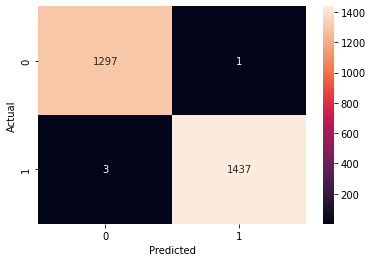

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['0','1']
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
 xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')